# Testing functions


<h2>Vitální charakteristiky</h2>
    <ul>
        <li>HR - Tepová frekvence (bpm)</li>
        <li>O2Sat - Saturace O2 (%)</li>
        <li>Temp - Teplota těla (° C)</li>
        <li>SBP - Systolický tlak (mmHg)</li>
        <li>MAP - Střední arteriální tlak (mmHg)</li>
        <li>DBP - Diastolický tlak (mmHg)</li>
        <li>Resp - Dechová frekvence (počet dechů za minutu)</li>
        <li>EtCO2 - Obsah CO2 ve vzduchu na konci výdechu (end-tidal CO2) (mmHg)</li>
    </ul>

<h2>Laboratorní vyšetření</h2>
    <ul>
        <li>BaseExcess - Measure of excess bicarbonate (mmol/L)</li>
        <li>HCO3 - Bikarbonáty (mmol/L)</li>
        <li>FiO2 - koncentrace O2 ve vdechovaném vzduchu (%)</li>
        <li>PaCO2 - Parciální tlak CO2 v arteriální krvi (mmHg)</li>
        <li>SaO2 - Saturace O2 v arteriální krvi (%)</li>
        <li>AST - Aspartátaminotransferáza (IU/L)</li>
        <li>BUN - Močovinový dusík v krvi (mg/dL)</li>
        <li>Alkalinephos - Alkalická fosfatáza (IU/L)</li>
        <li>Calcium - Vápník (mg/dL)</li>
        <li>Chloride - Chloridy (mmol/L)</li>
        <li>Creatinine - Kreatinin (mg/dL)</li>
        <li>Bilirubin_direct - Bilirubin přímý (mg/dL)</li>
        <li>Glucose - Glykemie (mg/dL)</li>
        <li>Lactate - Laktát (mg/dL)</li>
        <li>Magnesium - Hořčík (mmol/dL)</li>
        <li>Phosphate - Fosfát (mg/dL)</li>
        <li>Potassium - Draslík (mmol/L)</li>
        <li>Bilirubin_total - Bilirubin celkový (mg/dL)</li>
        <li>TroponinI - Troponin I (ng/mL)</li>
        <li>Hct - Hematokrit (%)</li>
        <li>Hgb - Hemoglobin (g/dL)</li>
        <li>PTT - Aktivovaný parciální tromboplastinový čas (s)</li>
        <li>WBC - Leukocyty (*10^3/µL)</li>
        <li>Fibrinogen - Fibrinogen (mg/dL)</li>
        <li>Platelets - Trombocyty (count*10^3/µL)</li>
    </ul>

<h2>Demografické charakteristiky</h2>
    <ul>
        <li>Age - Věk</li>
        <li>Gender Pohlaví: žena (0) or muž (1)</li>
        <li>Unit1 ID JIP (MICU)</li>
        <li>Unit2 ID JIP (SICU)</li>
        <li>HospAdmTime - Počet hodin mezi hospitalizaci a umístěním na JIP</li>
        <li>ICULOS - Doba strávená na JIP (hod)</li>
        <li>Stav pacienta isSepsis 0 – neseptický, 1 – septický (odhadovaná veličina)</li>
    </ul>



In [187]:
import pandas as pd
import numpy as np

In [80]:
# For displaying all rows and columns in a specific Jupyter Notebook cell
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [82]:
# Reset display options to default values
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [195]:
def replaceOutliers(table):
    # odstraňování odlehlých hodnot
    for column in table.columns:
        # Výpočet mediánu pro daný sloupec
        median_value = table[column].median()

        # Počet směrodatných odchylek od mediánu
        num_std_dev = 3

        # Výpočet spodní a vrchní hranice s použitím násobku směrodatné odchylky a mediánu
        lower_bound = median_value - num_std_dev * table[column].std()
        upper_bound = median_value + num_std_dev * table[column].std()

        # Nahrazení odlehlých hodnot hodnotami NaN
        table.loc[table[column]<lower_bound, column] = np.nan
        table.loc[table[column]>upper_bound, column] = np.nan

    return table


In [196]:
def dropIrrelevantColumns(table):
    # Odstranění sloupců, které mají počet NaN hodnot větší, než 25 % celkového počtu řádků

    dropList = [] # list sloupců, které mají více jak 20000 NaN hodnot

    for column in table.columns:
        if table[column].isnull().sum() > (table.shape[0]*0.25):
            dropList.append(column)

    filteredTable = table.drop(columns=dropList)  

    return filteredTable

# Načtení datasetu

In [205]:
# Cesta k tabulce s pacienty
filepath = './dataSepsis.csv'

# Načtení celé tabulky
fullSepsis = pd.read_csv(filepath, sep=';')

fullSepsis = dropIrrelevantColumns(fullSepsis)

# Rozdělení tabulky do dvou datasetů
sepsis0 = fullSepsis[fullSepsis["isSepsis"] == 0] # dataset pacientů bez sepse (0)
sepsis1 = fullSepsis[fullSepsis["isSepsis"] == 1] # dataset pacientů se sepsí (1)



<Axes: >

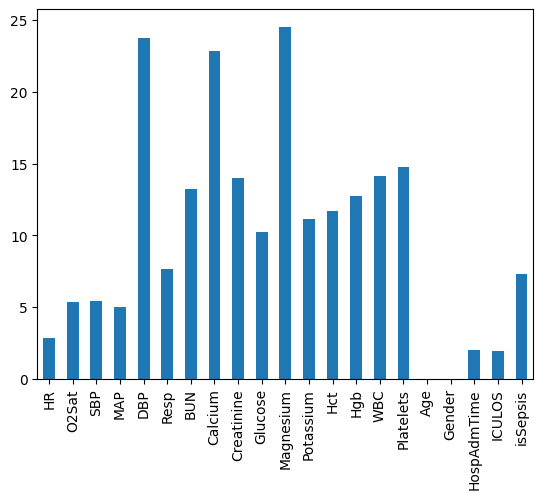

In [206]:
relevantFullSepsis = replaceOutliers(fullSepsis)
percentageOfNaN = (relevantFullSepsis.isnull().sum()/relevantFullSepsis.shape[0])*100
percentageOfNaN.plot(kind="bar")

# Předzpracování

# Předzpracování datasetu s pacienty bez sepse

In [207]:
relevantSepsis0 = replaceOutliers(sepsis0)
# odstranění řádků, které mají 1 a více NaN




In [208]:
relevantSepsis0.dropna()

,HR,O2Sat,SBP,MAP,DBP,Resp,BUN,Calcium,Creatinine,Glucose,...,Potassium,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,isSepsis
5,73.0,99.0,100.0,67.0,49.5,16.5,28.0,7.40,1.20,129.0,...,4.50,32.9,11.4,11.4,357.0,87.08,1.0,-2.23,2.0,0.0
16,98.0,94.0,95.0,62.0,45.0,15.0,11.0,7.40,0.50,122.0,...,4.10,27.9,9.9,15.2,205.0,87.80,0.0,-122.18,10.0,0.0
21,89.0,96.0,73.5,55.0,46.0,14.0,19.0,8.30,0.90,140.0,...,4.30,29.1,10.1,17.0,234.0,63.77,1.0,-4.80,5.0,0.0
23,80.0,99.0,129.0,100.0,77.0,18.0,8.0,8.00,0.60,118.0,...,3.80,28.0,9.3,15.0,341.0,47.01,0.0,-158.44,10.0,0.0
24,79.0,99.0,133.0,76.0,50.0,15.0,12.0,8.40,0.70,142.0,...,4.30,39.1,13.3,10.4,326.0,66.28,1.0,-66.29,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36292,82.0,97.0,116.0,72.0,48.0,22.0,19.0,8.90,1.33,151.0,...,3.50,40.1,13.3,14.6,263.0,100.00,0.0,-2.83,14.0,0.0
36293,74.0,97.0,120.0,72.0,44.0,12.0,14.0,7.50,0.79,90.0,...,4.10,26.3,8.4,6.4,96.0,81.00,0.0,-66.13,16.0,0.0
36296,73.0,100.0,120.0,78.0,58.0,14.5,11.0,4.79,1.13,141.5,...,4.65,30.3,10.3,7.2,71.0,71.00,1.0,-29.57,10.0,0.0
36297,59.0,95.0,154.0,110.0,82.0,14.0,9.0,8.80,0.81,116.0,...,3.50,39.2,13.1,7.0,154.0,76.00,1.0,-14.90,19.0,0.0


In [114]:
relevantSepsis0.sample(n=2000)

,HR,O2Sat,SBP,MAP,DBP,Resp,BUN,Calcium,Creatinine,Glucose,...,Potassium,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,isSepsis
23540,83.0,94.5,109.0,83.0,77.0,17.0,17.0,8.4,1.22,167.0,...,3.7,33.8,11.3,15.3,275.0,48.0,1.0,-19.54,4.0,0.0
30102,124.0,98.0,117.0,89.0,71.0,17.0,6.0,8.6,0.40,114.0,...,3.8,23.5,8.3,11.7,240.0,61.0,1.0,-191.28,10.0,0.0
31244,66.0,100.0,164.0,106.0,76.0,15.0,11.0,7.9,0.76,210.0,...,4.5,26.5,8.9,7.1,77.0,50.0,0.0,-14.36,13.0,0.0
34220,77.0,95.0,174.0,120.0,84.0,19.0,9.0,8.5,0.85,116.0,...,3.2,29.1,9.6,11.6,416.0,65.0,0.0,-4.51,11.0,0.0
32412,99.0,99.0,109.0,72.0,53.0,13.0,20.0,9.0,0.96,110.5,...,4.7,27.5,8.8,7.0,127.0,76.0,1.0,-156.60,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30414,95.0,100.0,150.0,77.0,51.0,23.5,17.0,7.7,1.36,124.0,...,4.6,28.7,9.4,18.7,111.0,82.0,1.0,-233.93,4.0,0.0
16394,104.0,100.0,142.0,94.5,76.0,14.5,15.0,8.4,1.40,84.0,...,4.5,30.2,10.5,16.6,101.0,80.6,0.0,-24.83,38.0,0.0
26217,103.0,91.0,129.0,94.0,80.0,26.0,11.0,8.0,0.34,159.0,...,4.0,44.4,13.8,28.1,171.0,66.0,0.0,-116.65,13.0,0.0
28489,101.0,96.0,111.0,93.0,84.0,15.0,66.0,10.5,1.93,148.0,...,5.1,45.0,12.8,6.6,141.0,72.0,0.0,-12.04,12.0,0.0


In [ ]:
import matplotlib.pyplot as plt

# Create individual scatter plots for each column
for column in sepsis0.columns:
    plt.figure()  # Create a new figure for each scatter plot
    plt.scatter(range(len(sepsis0[column])), sepsis0[column])
    plt.title(f'Scatter Plot for Column {column}')
    plt.xlabel('Index')
    plt.ylabel('Values')

plt.show()

# Předzpracování datasetu s pacienty se sepsí 

In [108]:
relevantSepsis1 = replaceOutliers(sepsis1)
relevantSepsis1.count()

HR             2575
O2Sat          2470
SBP            2372
MAP            2518
DBP            1972
Resp           2381
BUN             958
Calcium         983
Creatinine      920
Glucose        1381
Magnesium       935
Potassium      1235
Hct            1042
Hgb             962
WBC             880
Platelets       885
Age            2647
Gender         2647
HospAdmTime    2464
ICULOS         2491
isSepsis       2647
dtype: int64

In [174]:
from scipy.stats import pearsonr

pearsonr(relevantSepsis0["O2Sat"].sample(n=2000), relevantSepsis1["O2Sat"].dropna().sample(n=2000))


PearsonRResult(statistic=0.013372969386190404, pvalue=0.5500333154118018)

# Odstranění sloupců, které mají počet NaN hodnot větší, než 25 % celkového počtu řádků

In [15]:
dropList = [] # list sloupců, které mají více jak 20000 NaN hodnot

for column in fullSepsis.columns:
    if fullSepsis[column].isnull().sum() > (fullSepsis.shape[0]*0.25):
        dropList.append(column)

filteredSepsis = fullSepsis.drop(columns=dropList)
filteredSepsis.columns

Index(['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'BUN', 'Calcium',
       'Creatinine', 'Glucose', 'Magnesium', 'Potassium', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

# Vykreslení scatter plotů pro vybrané sloupce

In [ ]:
import matplotlib.pyplot as plt

# Create individual scatter plots for each column
for column in filteredSepsis.columns:
    plt.figure()  # Create a new figure for each scatter plot
    plt.scatter(range(len(filteredSepsis[column])), filteredSepsis[column])
    plt.title(f'Scatter Plot for Column {column}')
    plt.xlabel('Index')
    plt.ylabel('Values')

plt.show()

# Vykreslení boxplotů pro vybrané sloupce

In [ ]:
import matplotlib.pyplot as plt

# Create individual boxplots for each column
for column in filteredSepsis.columns:
    plt.figure()  # Create a new figure for each boxplot
    filteredSepsis.boxplot(column=[column])
    plt.title(f'Boxplot for Column {column}')
    plt.ylabel('Values')

plt.show()

# Nahrazení odlehlých hodnot NaN hodnotami

In [106]:
filteredSepsis.loc[filteredSepsis["O2Sat"]<60, "O2Sat"] = np.nan

filteredSepsis["SBP"] = filteredSepsis.SBP.where(filteredSepsis.SBP.between(50,220))

filteredSepsis["MAP"] = filteredSepsis.MAP.where(filteredSepsis.MAP.between(40,150))

filteredSepsis["DBP"] = filteredSepsis.DBP.where(filteredSepsis.DBP.between(20,150))




# Testování normality pomocí Q-Q plotu

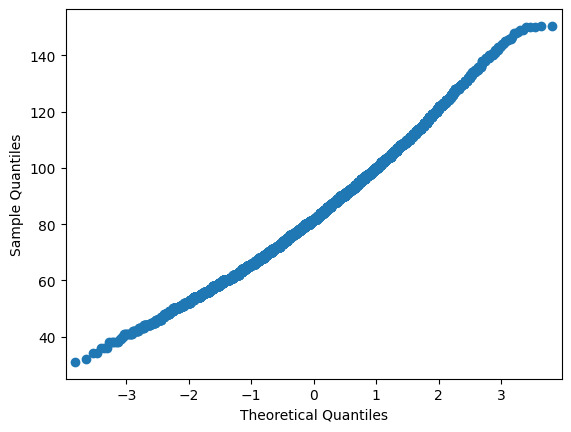

In [54]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(sepsis0["HR"])
plt.show()

In [6]:
for column in filteredSepsis.columns:
    n_NaN = filteredSepsis[column].isnull().sum()
    print(f"{column}, {n_NaN}")

HR, 796
O2Sat, 1566
SBP, 1685
MAP, 1456
DBP, 8385
Resp, 2412
BUN, 3776
Calcium, 7679
Creatinine, 4042
Glucose, 3045
Magnesium, 8631
Potassium, 3593
Hct, 4122
Hgb, 4486
WBC, 4842
Platelets, 4833
Age, 0
Gender, 0
HospAdmTime, 0
ICULOS, 0
isSepsis, 0
